<a href="https://colab.research.google.com/github/SachinGuria47/Analyzing-Price-Trends-and-Inflation-Patterns-in-India-s-Consumer-Price-Index--Rural-and-Urban--up-t/blob/main/Descriptive_and_Trend_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
#import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [34]:
df_original = pd.read_csv("cpi_india.csv")
df_original.head(6)

,Sector,Year,Month,Cereals and products,Meat and fish,Egg,Milk and products,Oils and fats,Fruits,Vegetables,...,Housing,Fuel and light,Household goods and services,Health,Transport and communication,Recreation and amusement,Education,Personal care and effects,Miscellaneous,General index
0,Rural,2013,January,107.5,106.3,108.1,104.9,106.1,103.9,101.9,...,NaN,105.5,104.8,104.0,103.3,103.4,103.8,104.7,104.0,105.1
1,Urban,2013,January,110.5,109.1,113.0,103.6,103.4,102.3,102.9,...,100.3,105.4,104.8,104.1,103.2,102.9,103.5,104.3,103.7,104.0
2,Rural+Urban,2013,January,108.4,107.3,110.0,104.4,105.1,103.2,102.2,...,100.3,105.5,104.8,104.0,103.2,103.1,103.6,104.5,103.9,104.6
3,Rural,2013,February,109.2,108.7,110.2,105.4,106.7,104.0,102.4,...,NaN,106.2,105.2,104.4,103.9,104.0,104.1,104.6,104.4,105.8
4,Urban,2013,February,112.9,112.9,116.9,104.0,103.5,103.1,104.9,...,100.4,105.7,105.2,104.7,104.4,103.3,103.7,104.3,104.3,104.7
5,Rural+Urban,2013,February,110.4,110.2,112.8,104.9,105.5,103.6,103.2,...,100.4,106.0,105.2,104.5,104.2,103.6,103.9,104.5,104.4,105.3


In [35]:
## removing the Rural+Urban from Sector in order to avoid redundancy
## df_cpi = having (Rural and Urban)
df_cpi = df_original[df_original['Sector'] != 'Rural+Urban']
df_cpi.head(6)

,Sector,Year,Month,Cereals and products,Meat and fish,Egg,Milk and products,Oils and fats,Fruits,Vegetables,...,Housing,Fuel and light,Household goods and services,Health,Transport and communication,Recreation and amusement,Education,Personal care and effects,Miscellaneous,General index
0,Rural,2013,January,107.5,106.3,108.1,104.9,106.1,103.9,101.9,...,NaN,105.5,104.8,104.0,103.3,103.4,103.8,104.7,104.0,105.1
1,Urban,2013,January,110.5,109.1,113.0,103.6,103.4,102.3,102.9,...,100.3,105.4,104.8,104.1,103.2,102.9,103.5,104.3,103.7,104.0
3,Rural,2013,February,109.2,108.7,110.2,105.4,106.7,104.0,102.4,...,NaN,106.2,105.2,104.4,103.9,104.0,104.1,104.6,104.4,105.8
4,Urban,2013,February,112.9,112.9,116.9,104.0,103.5,103.1,104.9,...,100.4,105.7,105.2,104.7,104.4,103.3,103.7,104.3,104.3,104.7
6,Rural,2013,March,110.2,108.8,109.9,105.6,106.2,105.7,101.4,...,NaN,106.1,105.6,104.7,104.6,104.0,104.3,104.3,104.6,106.0
7,Urban,2013,March,113.9,111.4,113.2,104.3,102.7,104.9,103.8,...,100.4,106.0,105.7,105.2,105.5,103.5,103.8,104.2,104.9,105.0


In [36]:
df_cpi.info() # to understand the data stored here

<class 'pandas.core.frame.DataFrame'>
Index: 266 entries, 0 to 397
Data columns (total 30 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Sector                               266 non-null    object 
 1   Year                                 266 non-null    int64  
 2   Month                                266 non-null    object 
 3   Cereals and products                 264 non-null    float64
 4   Meat and fish                        262 non-null    float64
 5   Egg                                  264 non-null    float64
 6   Milk and products                    264 non-null    float64
 7   Oils and fats                        264 non-null    float64
 8   Fruits                               264 non-null    float64
 9   Vegetables                           264 non-null    float64
 10  Pulses and products                  264 non-null    float64
 11  Sugar and Confectionery              

## Data Cleaning

In [37]:
# changing the datatype of Housing column
df_cpi['Housing'] = pd.to_numeric(df_cpi['Housing'], errors='coerce')
df_cpi.head(),df_cpi.info()

<class 'pandas.core.frame.DataFrame'>
Index: 266 entries, 0 to 397
Data columns (total 30 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Sector                               266 non-null    object 
 1   Year                                 266 non-null    int64  
 2   Month                                266 non-null    object 
 3   Cereals and products                 264 non-null    float64
 4   Meat and fish                        262 non-null    float64
 5   Egg                                  264 non-null    float64
 6   Milk and products                    264 non-null    float64
 7   Oils and fats                        264 non-null    float64
 8   Fruits                               264 non-null    float64
 9   Vegetables                           264 non-null    float64
 10  Pulses and products                  264 non-null    float64
 11  Sugar and Confectionery              

<ipython-input-37-fe63b375557f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cpi['Housing'] = pd.to_numeric(df_cpi['Housing'], errors='coerce')


(  Sector  Year     Month  Cereals and products  Meat and fish    Egg  \
 0  Rural  2013   January                 107.5          106.3  108.1   
 1  Urban  2013   January                 110.5          109.1  113.0   
 3  Rural  2013  February                 109.2          108.7  110.2   
 4  Urban  2013  February                 112.9          112.9  116.9   
 6  Rural  2013     March                 110.2          108.8  109.9   
 
    Milk and products  Oils and fats  Fruits  Vegetables  ...  Housing  \
 0              104.9          106.1   103.9       101.9  ...      NaN   
 1              103.6          103.4   102.3       102.9  ...    100.3   
 3              105.4          106.7   104.0       102.4  ...      NaN   
 4              104.0          103.5   103.1       104.9  ...    100.4   
 6              105.6          106.2   105.7       101.4  ...      NaN   
 
    Fuel and light  Household goods and services  Health  \
 0           105.5                         104.8   104

In [43]:
# handling the missing values
# using Linear Interpolation to fill the missing values

df_cleaned = df_cpi.interpolate(method='linear')
df_cleaned = df_cleaned.fillna(method='bfill') # to handle the missing values in the first row
df_cleaned.head(6)


<ipython-input-43-623bdeef90d2>:4: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df_cleaned = df_cpi.interpolate(method='linear')
<ipython-input-43-623bdeef90d2>:5: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_cleaned = df_cleaned.fillna(method='bfill')


,Sector,Year,Month,Cereals and products,Meat and fish,Egg,Milk and products,Oils and fats,Fruits,Vegetables,...,Housing,Fuel and light,Household goods and services,Health,Transport and communication,Recreation and amusement,Education,Personal care and effects,Miscellaneous,General index
0,Rural,2013,January,107.5,106.3,108.1,104.9,106.1,103.9,101.9,...,100.30,105.5,104.8,104.0,103.3,103.4,103.8,104.7,104.0,105.1
1,Urban,2013,January,110.5,109.1,113.0,103.6,103.4,102.3,102.9,...,100.30,105.4,104.8,104.1,103.2,102.9,103.5,104.3,103.7,104.0
3,Rural,2013,February,109.2,108.7,110.2,105.4,106.7,104.0,102.4,...,100.35,106.2,105.2,104.4,103.9,104.0,104.1,104.6,104.4,105.8
4,Urban,2013,February,112.9,112.9,116.9,104.0,103.5,103.1,104.9,...,100.40,105.7,105.2,104.7,104.4,103.3,103.7,104.3,104.3,104.7
6,Rural,2013,March,110.2,108.8,109.9,105.6,106.2,105.7,101.4,...,100.40,106.1,105.6,104.7,104.6,104.0,104.3,104.3,104.6,106.0
7,Urban,2013,March,113.9,111.4,113.2,104.3,102.7,104.9,103.8,...,100.40,106.0,105.7,105.2,105.5,103.5,103.8,104.2,104.9,105.0


In [49]:
# checking for duplicate values
duplicates = df_cleaned.duplicated(subset=['Year','Month','Sector']).sum()
duplicates

0

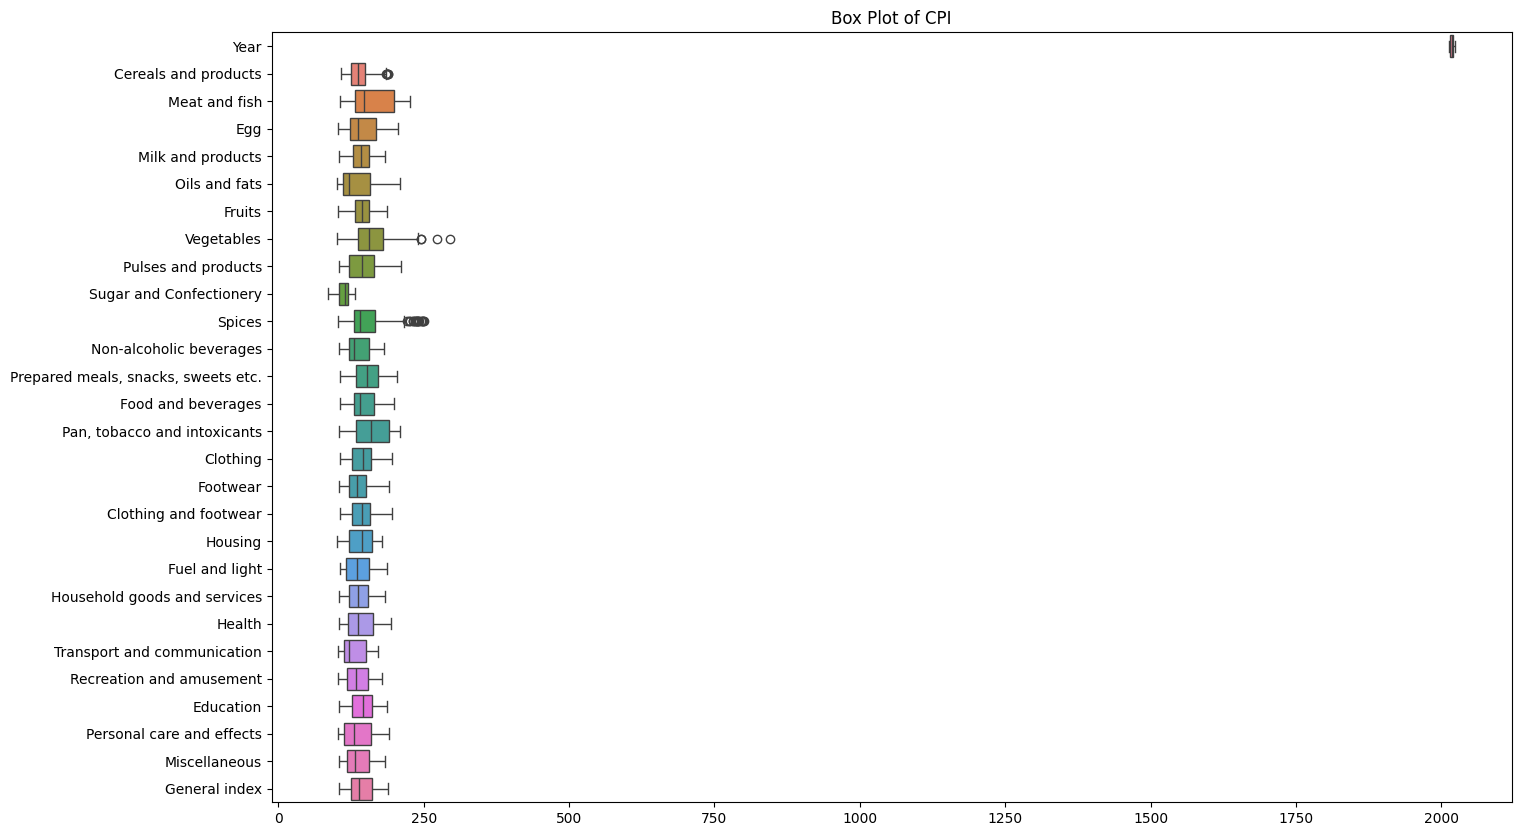

In [59]:
# check for outliers
plt.figure(figsize=(16,10))
sns.boxplot(data=df_cleaned, orient='h')
plt.title('Box Plot of CPI')
plt.show()